In [4]:
#Fashion Mnistb

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!kaggle datasets download -d zalando-research/fashionmnist

 92% 63.0M/68.8M [00:00<00:00, 174MB/s]
100% 68.8M/68.8M [00:00<00:00, 159MB/s]


In [6]:
import zipfile
zr = zipfile.ZipFile("/content/fashionmnist.zip", "r")
zr.extractall()
zr.close()

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
#train data
train = pd.read_csv("/content/fashion-mnist_train.csv")

In [9]:
#test data
test = pd.read_csv("/content/fashion-mnist_test.csv")

In [10]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#train, test shape
train.shape, test.shape

((60000, 785), (10000, 785))

In [13]:
# import tensorflow as tf
# import numpy as np


# # get the data
# (train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()


# def preprocess_images(images):
#     return images.reshape(-1, 784).astype(np.float32) / 255


# def preprocess_labels(labels):
#     return labels.reshape(-1).astype(np.int32)


# train_images = preprocess_images(train_images)
# test_images = preprocess_images(test_images)
# train_labels = preprocess_labels(train_labels)
# test_labels = preprocess_labels(test_labels)

# train_data = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(60000).batch(128).repeat()
# #test_data = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(128)


# # define the model first, from input to output

# # this is a super deep model, cool!
# n_units = 100
# n_layers = 8
# w_range = 0.4

# # just set up a "chain" of hidden layers
# # model is represented by a list where each element is a layer,
# # and each layer is in turn a list of the layer variables (w, b)

# # first layer goes from n_input to n_hidden
# w_input = tf.Variable(tf.random.uniform([784, n_units], -w_range, w_range),
#                       name="w0")
# b_input = tf.Variable(tf.zeros(n_units), name="b0")
# layers = [[w_input, b_input]]

# # all other hidden layers go from n_hidden to n_hidden
# for layer in range(n_layers - 1):
#     w = tf.Variable(tf.random.uniform([n_units, n_units], -w_range, w_range),
#                     name="w" + str(layer+1))
#     b = tf.Variable(tf.zeros(n_units), name="b" + str(layer+1))
#     layers.append([w, b])

# # finally add the output layer
# w_out = tf.Variable(tf.random.uniform([n_units, 10], -w_range, w_range),
#                     name="wout")
# b_out = tf.Variable(tf.zeros(10), name="bout")
# layers.append([w_out, b_out])

# # flatten the layers to get a list of variables
# all_variables = [variable for layer in layers for variable in layer]


# def model_forward(inputs):
#     x = inputs
#     for w, b in layers[:-1]:
#         x = tf.nn.relu(tf.matmul(x, w) + b)
#     logits = tf.matmul(x, layers[-1][0]) + layers[-1][1]

#     return logits


# lr = 0.1
# train_steps = 2000
# for step, (img_batch, lbl_batch) in enumerate(train_data):
#     if step > train_steps:
#         break

#     with tf.GradientTape() as tape:
#         # here we just run all the layers in sequence via a for-loop
#         logits = model_forward(img_batch)
#         xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
#             logits=logits, labels=lbl_batch))

#     grads = tape.gradient(xent, all_variables)
#     for grad, var in zip(grads, all_variables):
#         var.assign_sub(lr*grad)

#     if not step % 100:
#         preds = tf.argmax(logits, axis=1, output_type=tf.int32)
#         acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch), tf.float32))
#         print("Loss: {} Accuracy: {}".format(xent, acc))


# test_preds = model_forward(test_images)
# test_preds = tf.argmax(test_preds, axis=1, output_type=tf.int32)
# acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, test_labels), tf.float32))
# print("Final test accuracy: {}".format(acc))


#shuffle is used to randomly shuffle elements of a dataset, this adds randomeness and remove inherent order which can reduce overfitting.

#batch is used to create batches of a specified number if the batch size is 32 then 32 images
#will be passed at one time and can reduce required memory

#repeat works like epochs and is used to iterate over a dataset multiple times during training.

In [14]:
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

11490434/11490434 [==============================] - 0s 0us/step


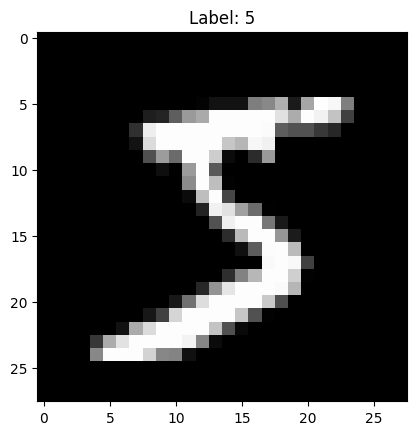

Epoch 1/5
468/468 [==============================] - 21s 42ms/step - loss: 0.4521 - accuracy: 0.8659 - val_loss: 0.1562 - val_accuracy: 0.9528
Epoch 2/5
468/468 [==============================] - 21s 44ms/step - loss: 0.1406 - accuracy: 0.9567 - val_loss: 0.1110 - val_accuracy: 0.9651
Epoch 3/5
468/468 [==============================] - 20s 43ms/step - loss: 0.1097 - accuracy: 0.9668 - val_loss: 0.0934 - val_accuracy: 0.9719
Epoch 4/5
468/468 [==============================] - 21s 45ms/step - loss: 0.0883 - accuracy: 0.9728 - val_loss: 0.0913 - val_accuracy: 0.9716
Epoch 5/5
468/468 [==============================] - 20s 42ms/step - loss: 0.0761 - accuracy: 0.9761 - val_loss: 0.0967 - val_accuracy: 0.9696


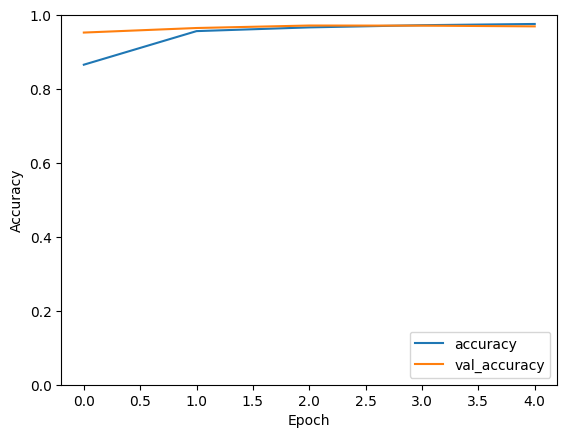

In [15]:
# Load MNIST data
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Visualize an image
index = 0
image_pixels = train_images[index]
plt.imshow(image_pixels, cmap='gray')
plt.title(f"Label: {train_labels[index]}")
plt.show()

# Preprocess images and labels
def preprocess_images(images):
    return images.reshape(-1, 28, 28, 1).astype(np.float32) / 255

def preprocess_labels(labels):
    return tf.keras.utils.to_categorical(labels, 10).astype(np.int32)

train_images = preprocess_images(train_images)
test_images = preprocess_images(test_images)
train_labels = preprocess_labels(train_labels)
test_labels = preprocess_labels(test_labels)

# Create TensorFlow datasets
train_data = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(60000).batch(128).repeat()
test_data = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(128)

# Build the CNN model
cnn = Sequential()
cnn.add(Conv2D(128, kernel_size=(3,3), strides=(2,2), activation="relu", input_shape=(28, 28, 1)))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(64, kernel_size=(3,3), strides=(2,2), activation="relu"))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Flatten())
cnn.add(Dense(128, activation="relu"))
cnn.add(Dense(64, activation="relu"))
cnn.add(Dense(10, activation="softmax"))

# Compile the model
cnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train the model using the datasets
history = cnn.fit(train_data, epochs=5, validation_data=test_data, steps_per_epoch=len(train_images)//128, validation_steps=len(test_images)//128)

# Visualize training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


In [16]:
#CIFAR100

In [36]:
(X_images, X_labels), (y_images, y_labels) = tf.keras.datasets.cifar100.load_data()

In [37]:
X_labels = to_categorical(X_labels, num_classes=100)
y_labels = to_categorical(y_labels, num_classes=100)

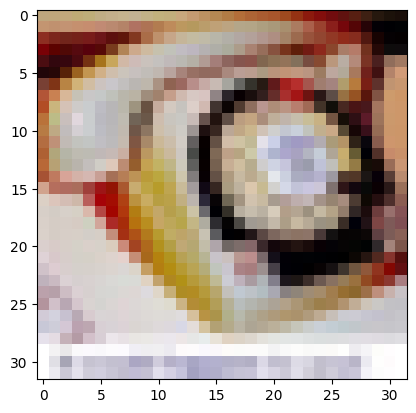

In [38]:
plt.imshow(X_images[5])

In [39]:
X_images[0].shape

(32, 32, 3)

In [40]:
X_images, y_images = X_images/255, y_images/255

In [41]:
X_images.shape

(50000, 32, 32, 3)

In [42]:
np.unique(X_labels)

array([0., 1.], dtype=float32)

In [48]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), strides=(2,2), padding="valid", activation="relu", input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), strides=(2,2), padding="valid", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation="relu"))
# model.add(Dense(64, activation="relu"))
model.add(Dense(100, activation="softmax"))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [49]:
hist = model.fit(X_images, X_labels, epochs=5, validation_data=(y_images, y_labels))

Epoch 1/5
1563/1563 [==============================] - 17s 10ms/step - loss: 4.1128 - accuracy: 0.0691 - val_loss: 3.7941 - val_accuracy: 0.1172
Epoch 2/5
1563/1563 [==============================] - 15s 9ms/step - loss: 3.6563 - accuracy: 0.1354 - val_loss: 3.5583 - val_accuracy: 0.1538
Epoch 3/5
1563/1563 [==============================] - 15s 10ms/step - loss: 3.4633 - accuracy: 0.1679 - val_loss: 3.4290 - val_accuracy: 0.1833
Epoch 4/5
1563/1563 [==============================] - 15s 9ms/step - loss: 3.3462 - accuracy: 0.1906 - val_loss: 3.3407 - val_accuracy: 0.1937
Epoch 5/5
1563/1563 [==============================] - 15s 9ms/step - loss: 3.2541 - accuracy: 0.2069 - val_loss: 3.2983 - val_accuracy: 0.2043


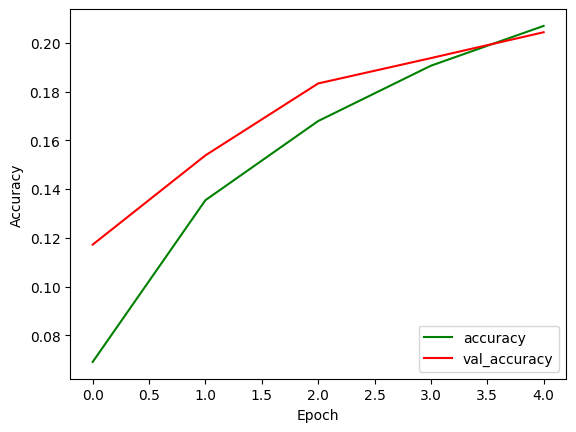

In [55]:
plt.plot(hist.history["accuracy"], c="green", label="accuracy")
plt.plot(hist.history["val_accuracy"], c="red", label="val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")

RNN

#It is wasteful to pad sequences to max length because if most words are not of near max length it would consume more size and time during model training and makes the model complex unnecessarily.

In [56]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

In [57]:
# remove infrequent words. you can play with this parameter as it will likely impact model quality
num_words = 20000
(train_sequences, train_labels), (test_sequences, test_labels) = tf.keras.datasets.imdb.load_data(num_words=num_words)

17464789/17464789 [==============================] - 0s 0us/step


In [58]:
# look at some sequences. words have been replaced with arbitrary index mappings
# 1 is a special "beginning of sequence" marker
# infrequent words have been replaced by the index 2
# actual words start with index 4, 3 is never used (???)
train_sequences[:3]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 82

In [59]:
# labels are simply binary: sentiment can be positive or negative
train_labels[:3]

array([1, 0, 0])

In [60]:
# to restore words, load the word-to-index mapping
word_to_index = tf.keras.datasets.imdb.get_word_index()

1641221/1641221 [==============================] - 0s 0us/step


In [61]:
# invert to get index-to-word mapping
index_to_word = dict((index, word) for (word, index) in word_to_index.items())

In [62]:
# we can convert a sequence to text by
# - replacing each index by the respective word
# - joining words together via spaces
# note that we remove the beginning of sequence character and we have to subtract 3 from all indices
# this is because, as mentioned above, the smallest indices are reserved for special characters
# but for some reason this is not reflected in the mapping...
" ".join([index_to_word.get(index - 3, "UNKNOWN") for index in train_sequences[0][1:]])

"this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert UNKNOWN is an amazing actor and now the same being director UNKNOWN father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the UNKNOWN of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be pr

In [63]:
# solution is padding all sequences to the maximum length.
# first find the maximum length
sequence_lengths = [len(sequence) for sequence in train_sequences]
max_len = max(sequence_lengths)
max_len

2494

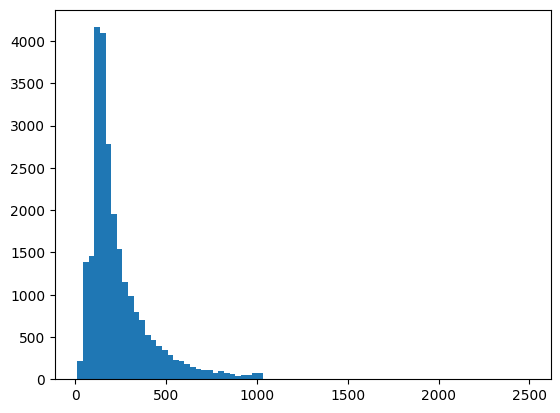

In [64]:
# overview over sequence lengths in the data
# could also look at mean, median, standard deviation...
plt.hist(sequence_lengths, bins=80)
plt.show()

In [65]:
# luckily there is a convenient function for padding
train_sequences_padded = tf.keras.preprocessing.sequence.pad_sequences(train_sequences, maxlen=max_len)

In [66]:
# now we can create a dataset!
train_data = tf.data.Dataset.from_tensor_slices((train_sequences_padded, train_labels))

In [67]:
# all sequences are... very long
train_sequences_padded.shape

(25000, 2494)

In [68]:
# it would be better to do something like this
# all sequences above maxlen will be truncated to that length
# note: pad_sequences has "pre" and "post" options for both padding and truncation. one may be better than the other!
train_sequences_padded = tf.keras.preprocessing.sequence.pad_sequences(train_sequences, maxlen=200)
train_data = tf.data.Dataset.from_tensor_slices((train_sequences_padded, train_labels))

train_sequences_padded.shape

(25000, 200)

In [69]:
# for fun, you can look at the word-index mappings.
# in this case, the mapping was done according to word frequency.
# you can pass reverse=True to sorted() to look at the least common words.
sorted(index_to_word.items())[:100]

[(1, 'the'),
 (2, 'and'),
 (3, 'a'),
 (4, 'of'),
 (5, 'to'),
 (6, 'is'),
 (7, 'br'),
 (8, 'in'),
 (9, 'it'),
 (10, 'i'),
 (11, 'this'),
 (12, 'that'),
 (13, 'was'),
 (14, 'as'),
 (15, 'for'),
 (16, 'with'),
 (17, 'movie'),
 (18, 'but'),
 (19, 'film'),
 (20, 'on'),
 (21, 'not'),
 (22, 'you'),
 (23, 'are'),
 (24, 'his'),
 (25, 'have'),
 (26, 'he'),
 (27, 'be'),
 (28, 'one'),
 (29, 'all'),
 (30, 'at'),
 (31, 'by'),
 (32, 'an'),
 (33, 'they'),
 (34, 'who'),
 (35, 'so'),
 (36, 'from'),
 (37, 'like'),
 (38, 'her'),
 (39, 'or'),
 (40, 'just'),
 (41, 'about'),
 (42, "it's"),
 (43, 'out'),
 (44, 'has'),
 (45, 'if'),
 (46, 'some'),
 (47, 'there'),
 (48, 'what'),
 (49, 'good'),
 (50, 'more'),
 (51, 'when'),
 (52, 'very'),
 (53, 'up'),
 (54, 'no'),
 (55, 'time'),
 (56, 'she'),
 (57, 'even'),
 (58, 'my'),
 (59, 'would'),
 (60, 'which'),
 (61, 'only'),
 (62, 'story'),
 (63, 'really'),
 (64, 'see'),
 (65, 'their'),
 (66, 'had'),
 (67, 'can'),
 (68, 'were'),
 (69, 'me'),
 (70, 'well'),
 (71, 'than'),


In [70]:
b# here is a high-level sketch for training RNNs


# training loop -- same thing as before!!
# our data is now slightly different (each batch of sequences has a time axis, which is kinda new)
# but all the related changes are hidden away at lower levels
def train_loop():
    for sequence_batch, label_batch in train_data:
        train_step(sequence_batch, label_batch)


# a single training step -- again, seems familiar?
def train_step(sequences, labels):
    with tf.GradientTape() as tape:
        logits = rnn_loop(sequences)
        loss = loss_fn(labels, logits)

    gradient = ...
    apply_gradients(...)


# here's where things start to change
# we loop over the input time axis, and at each time step compute the new
# hidden state based on the previous one as well as the current input
# the state computation is hidden away in the rnn_step function and could be
# arbitrarily complex.
# in the general RNN, an output is computed at each time step, and the whole
# sequence is returned. but in this case, since we only have one label for the
# entire sequence, we only use the final state to compute one output and return it.
# before the loop, the state need to be initialized somehow.
def rnn_loop(sequences):
    old_state = ...

    for step in range(max_len):
        x_t = sequences[:, step]
        x_t = tf.one_hot(x_t, depth=num_words)
        new_state = rnn_step(old_state, x_t)

        old_state = new_state

    o_t = output_layer(new_state)

    return o_t


# see formulas in the book ;)
def rnn_step(state, x_t):
    return rnn_layer(x_t, initial_state=state)

RNN2

In [4]:
max_words = 20000
max_len = 200

(train_sequences, train_labels), (test_sequences, test_labels) = tf.keras.datasets.imdb.load_data(num_words=max_words)


def preprocess(sequences, labels):
    return sequences, labels.astype(np.int32)

train_sequences, train_labels = preprocess(train_sequences, train_labels)
test_sequences, test_labels = preprocess(test_sequences, test_labels)

In [5]:
vocabulary = tf.keras.datasets.imdb.get_word_index()
char_to_ind = vocabulary
ind_to_char = {ind: char for (char, ind) in vocabulary.items()}

In [6]:
# remember this? doesn't work...
# train_data = tf.data.Dataset.from_tensor_slices((train_sequences, train_labels))

In [7]:
# we can create a dataset from a python generator. first, we have to write the generator
# this is a very simple one, but we could execute arbitrary python code in here
# (say, loading files from disk and preparing the loaded inputs somehow)
def gen():
    for sequence, label in zip(train_sequences, train_labels):
        yield sequence, label

In [8]:
# we have to tell TF what to expect from the generator ("Tensor Specification")
train_data = tf.data.Dataset.from_generator(gen, output_signature=(
         tf.TensorSpec(shape=(None,), dtype=tf.int32),
         tf.TensorSpec(shape=(), dtype=tf.int32)))

# regular .batch wouldn't work because the inputs are different length.
# padded batch automatically pads all elements in the batch to the longest length
# per dimension.
# you can also specify different shapes and padding values other than 0.
# padding is always "post"
train_data = train_data.padded_batch(32)

In [9]:
# for sequence, label in train_data:
#     print(sequence.shape, label.shape)
#     input()

In [10]:
# we have to tell TF what to expect from the generator ("Tensor Specification")
train_data = tf.data.Dataset.from_generator(gen, output_signature=(
         tf.TensorSpec(shape=(None,), dtype=tf.int32),
         tf.TensorSpec(shape=(), dtype=tf.int32)))

# alternatively, we can use bucketing. the idea is to define buckets for specific
# sequence lengths, and put all sequences in their corresponding bucket.
# when a batch is requested, first a bucket is selected and then all elements of
# the batch are taken from this bucket.
# this guarantees that all elements in a batch are roughly the same length,
# minimizing the amount of padding.

# here is an example with buckets in steps of 50. all sequences above length 500
# end up in the same bucket. same for sequences below length 50.
# do note that I by no means claim that this is a "good" bucketing. play around with it!
buckets = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
bucket_batch_size = [32] * (len(buckets) + 1)
train_data = train_data.bucket_by_sequence_length(lambda sequence, label: tf.shape(sequence)[0],
                                                  bucket_boundaries=buckets, bucket_batch_sizes=bucket_batch_size)

In [11]:
# NOTE!!
# you should probably still remove very long sequences (longer than some cutoff)
# before converting to a dataset

In [12]:
# compare the average batch shapes with the padded_batch example. there, batches are
# often length 800 or so because the longest sequence in the batch happened to
# have that length.
# with bucketing, we get many much smaller batches, meaning more efficient training.
# for sequence, label in train_data:
#     print(sequence.shape, label.shape)
#     input()

KeyboardInterrupt: ignored

In [13]:
# here's a very simple toy example for a keras lstm
# the "hidden dimensions" are just randomly chosen.
# you probably don't want to use a hidden size of 12 =) (but maybe it's actually really good?)


# embedding comes first to replace one-hot vectors.
#    mask_zero=True to prevent computations on padded time steps.
# then an arbitrary number of RNN layers.
# deeper RNN layers take as input sequence the state sequence of the layer before,
# so all layers except the last one should return_sequences=True
# finally, a Dense layer for the output, since the output computation is *not*
# included in the RNN cells; all cells provided by Keras only compute the states
model = tf.keras.Sequential([tf.keras.layers.Embedding(max_words, 20, mask_zero=True),
                             tf.keras.layers.LSTM(12, return_sequences=True),
                             tf.keras.layers.LSTM(15),
                             tf.keras.layers.Dense(1)])


# FYI, the third line is the same as the first two lines together.
# the second option can use a much more efficient implementation, it will be SOOO much faster.
# try it yourself!
#rnn_cell = tf.keras.layers.LSTMCell(12)
#rnn = tf.keras.layers.RNN(rnn_cell, return_sequences=False)
rnn = tf.keras.layers.LSTM(12, return_sequences=False)

In [14]:
# calling RNN layers is easy!
one_hot_batch = tf.one_hot(sequence, depth=max_words)
rnn(one_hot_batch)

<tf.Tensor: shape=(32, 12), dtype=float32, numpy=
array([[ 1.03182076e-02, -9.85400379e-03,  5.38728898e-03,
        -3.12197069e-03, -3.59827327e-03, -6.01565279e-03,
         1.02322851e-03, -5.91283059e-03,  9.63811390e-03,
        -1.13183735e-02, -7.47258868e-03,  6.39468490e-04],
       [ 2.87764269e-04, -1.08905241e-03,  1.16517686e-03,
         1.54600409e-03,  1.21857668e-03, -1.29989360e-03,
        -1.82603544e-03, -3.12129455e-03, -8.18572880e-04,
        -5.58801787e-03, -5.45064453e-03, -2.10679005e-04],
       [ 1.27036842e-02, -1.29913203e-02,  7.83124659e-03,
        -3.50800809e-03, -2.37028231e-03, -8.41268245e-03,
         2.12897686e-03, -6.53660670e-03,  9.48545337e-03,
        -1.35633145e-02, -1.09938420e-02,  1.67535339e-03],
       [ 1.21668205e-02, -1.27318949e-02,  7.39842886e-03,
        -3.38792615e-03, -2.62178830e-03, -7.73355411e-03,
         1.92104396e-03, -6.50213007e-03,  9.49812308e-03,
        -1.31752575e-02, -1.01916669e-02,  1.56272762e-03],
  

Word2Vec

Given the sentence "I like to cuddle dogs", how many skipgrams are created with a window size of 2?
Total of 4 skipgrams

In general, how does the number of skipgrams relate to the size of the dataset (in terms of input-target
pairs)?
In general, the number of skip-grams is proportional to the product of the dataset size and the window size

Why is it not a good idea to compute the full softmax for classification?
Computing the full softmax for classification can be computationally expensive, especially when dealing with large numbers of classes. The softmax function is used to convert a vector of raw scores (logits) into a probability distribution over multiple classes.

The way the dataset is created, for a given (target, context) pair, are the negative samples
(remember, these are randomly sampled) the same each time this training example is seen, or are they
different?
Different when training a model

For the given example dataset (Shakespeare), would the code create (target, context) pairs for
sentences that span multiple lines? For example, the last word of one line and the first word of the next
line?
No

Does the code generate skipgrams for padding characters (index 0)?
No

The skipgrams function uses a "sampling table". In the code, this is shown to be a simple list of
probabilities, and it is created without any reference to the actual text data. How/why does this work?
I.e. how does the program "know" which words to sample with which probability?
The program "knows" which words to sample with which probability because the sampling table is pre-computed based on word frequencies.